## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

### L1 Regularization

In [5]:
from keras.regularizers import l1, l1_l2, l2
def build_mlp(input_shape, output_units=10, num=[512,256,128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, num in enumerate(num):
        if i == 0:
            x = keras.layers.Dense(units=num,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=num,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    #output 不進行Regularization
    output_layer = keras.layers.Dense(units=output_units,
                                      activation='softmax',
                                      name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for ratio in L1_EXP:
    keras.backend.clear_session()
    print("Experiment with L1 Regulizer = %.6f" % (ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=ratio)
    model.summary()
    
    optimizer = keras.optimizers.sgd(lr = LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L1 Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 67us/step - loss: 6.0154 - acc: 0.2725 - val_loss: 5.8153 - val_acc: 0.3408
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 5.7266 - acc: 0.3641 - val_loss: 5.6455 - val_acc: 0.3787
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 5.5821 - acc: 0.3942 - val_loss: 5.5226 - val_acc: 0.4021
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.4634 - acc: 0.4136 - val_loss: 5.4077 - val_acc: 0.4162
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 5.3544 - acc: 0.4298 - val_loss: 5.3082 - val_acc: 0.4329
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 5.2520 - acc: 0.4428 - val_loss: 5.2162 - val_acc: 0.4414
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 5.1556 - acc: 0.4548 - val_loss: 5.1269 - val_acc

50000/50000 [==============================] - 3s 58us/step - loss: 1.7164 - acc: 0.3981 - val_loss: 1.6849 - val_acc: 0.4102
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6591 - acc: 0.4169 - val_loss: 1.6386 - val_acc: 0.4220
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6111 - acc: 0.4341 - val_loss: 1.6039 - val_acc: 0.4302
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5720 - acc: 0.4481 - val_loss: 1.5698 - val_acc: 0.4478
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5391 - acc: 0.4610 - val_loss: 1.5507 - val_acc: 0.4564
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5099 - acc: 0.4709 - val_loss: 1.5216 - val_acc: 0.4643
Epoch 9/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4831 - acc: 0.4802 - val_loss: 1.5000 - val_acc: 0.4689
Epoch 10/50
50000/50000 [===========================

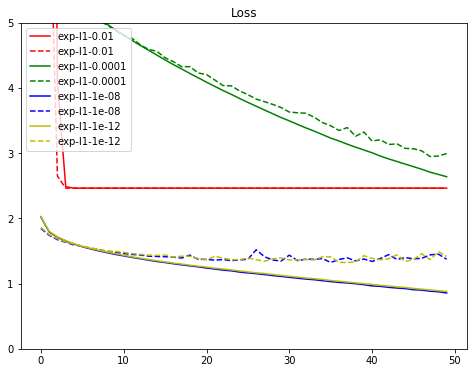

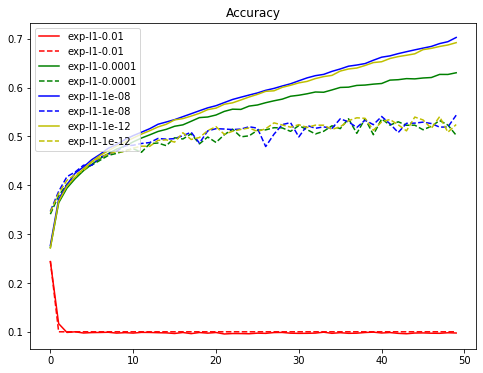

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### L1_L2 Regularization

In [10]:
def build_mlp(input_shape, output_units=10, num=[512,256,128], l1l2_ratio=1e-4):

    input_layer = keras.layers.Input(input_shape)
    for i, num in enumerate(num):
        if i == 0:
            x = keras.layers.Dense(units=num,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1),
                                   kernel_regularizer=l1_l2(l1l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=num,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1),
                                   kernel_regularizer=l1_l2(l1l2_ratio))(x)
    
    #output 不進行Regularization
    output_layer = keras.layers.Dense(units=output_units,
                                      activation='softmax',
                                      name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for ratio in L1L2_EXP:
    keras.backend.clear_session()
    print("Experiment with L1_L2 Regulizer = %.6f" % (ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1l2_ratio=ratio)
    model.summary()
    
    optimizer = keras.optimizers.sgd(lr = LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L1_L2 Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===============

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 73us/step - loss: 18.8355 - acc: 0.2571 - val_loss: 17.3843 - val_acc: 0.3172
Epoch 2/50
50000/50000 [==============================] - 3s 60us/step - loss: 16.1587 - acc: 0.3532 - val_loss: 14.9912 - val_acc: 0.3757
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 13.9670 - acc: 0.3767 - val_loss: 12.9849 - val_acc: 0.3864
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 12.1184 - acc: 0.3916 - val_loss: 11.2824 - val_acc: 0.4045
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 10.5474 - acc: 0.4011 - val_loss: 9.8415 - val_acc: 0.4030
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 9.2104 - acc: 0.4087 - val_loss: 8.6077 - val_acc: 0.4109
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 8.0709 - acc: 0.4137 - val_loss: 7.5628 

50000/50000 [==============================] - 3s 60us/step - loss: 13.0027 - acc: 0.3618 - val_loss: 12.1158 - val_acc: 0.3713
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 11.3359 - acc: 0.3842 - val_loss: 10.5923 - val_acc: 0.3879
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 9.9265 - acc: 0.3967 - val_loss: 9.2896 - val_acc: 0.4021
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 8.7280 - acc: 0.4072 - val_loss: 8.1885 - val_acc: 0.4113
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 7.7076 - acc: 0.4128 - val_loss: 7.2463 - val_acc: 0.4134
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 6.8345 - acc: 0.4199 - val_loss: 6.4440 - val_acc: 0.4216
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 6.0927 - acc: 0.4254 - val_loss: 5.7594 - val_acc: 0.4280
Epoch 9/50
50000/50000 [========================

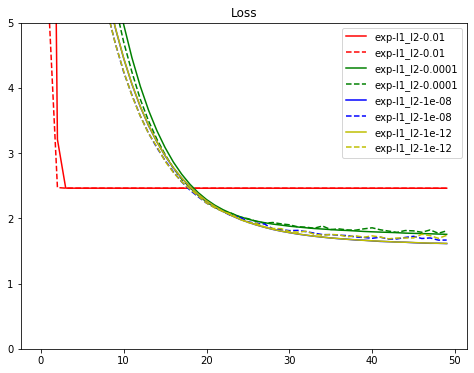

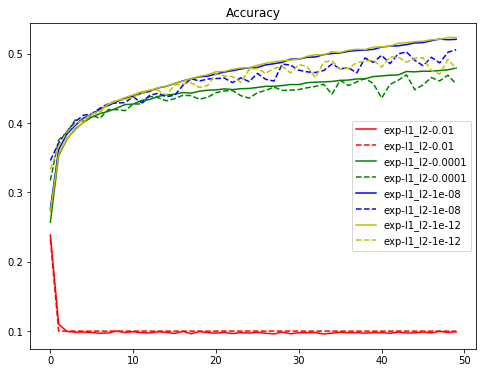

In [12]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### L2 Regularization

In [13]:
def build_mlp(input_shape, output_units=10, num=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, num in enumerate(num):
        if i == 0:
            x = keras.layers.Dense(units=num, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=num, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [14]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L2 Regulizer = %.6f" % (ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with L2 Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.1798 - acc: 0.2672 - val_loss: 2.0281 - val_acc: 0.3238
Epoch 2/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.9655 - acc: 0.3601 - val_loss: 1.9168 - val_acc: 0.3763
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.8830 - acc: 0.3882 - val_loss: 1.8545 - val_acc: 0.3990
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8259 - acc: 0.4104 - val_loss: 1.8022 - val_acc: 0.4140
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7756 - acc: 0.4271 - val_loss: 1.7615 - val_acc: 0.4291
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7347 - acc: 0.4425 - val_loss: 1.7217 - val_acc: 0.4482
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.7008 - acc: 0.4548 - val_loss: 1.6938 - val_acc

50000/50000 [==============================] - 3s 60us/step - loss: 1.7209 - acc: 0.3985 - val_loss: 1.6903 - val_acc: 0.4048
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6609 - acc: 0.4212 - val_loss: 1.6319 - val_acc: 0.4327
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6127 - acc: 0.4389 - val_loss: 1.5978 - val_acc: 0.4371
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5727 - acc: 0.4498 - val_loss: 1.5595 - val_acc: 0.4508
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5399 - acc: 0.4605 - val_loss: 1.5452 - val_acc: 0.4524
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5095 - acc: 0.4709 - val_loss: 1.5104 - val_acc: 0.4634
Epoch 9/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4811 - acc: 0.4802 - val_loss: 1.5078 - val_acc: 0.4679
Epoch 10/50
50000/50000 [===========================

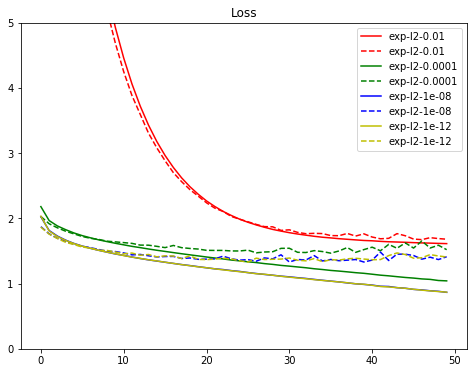

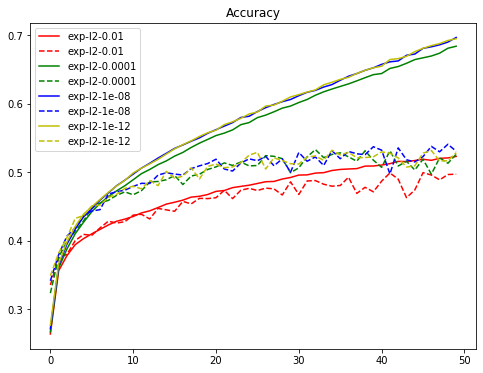

In [15]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Result
- l1 與 l2 Regularization的效果都不錯 能達到50% Accuracy
- Regularization的強度太高將對整體表現有顯著影響, 限制住參數的修正